# Branch Cuts in Complex Analysis

## Theoretical Foundation

### Multi-Valued Functions

In complex analysis, certain functions are inherently **multi-valued**. The most fundamental example is the complex logarithm. For a complex number $z = re^{i\theta}$ where $r > 0$, we can write:

$$\log(z) = \log(r) + i\theta$$

However, since $e^{i\theta} = e^{i(\theta + 2\pi k)}$ for any integer $k$, we have infinitely many possible values:

$$\log(z) = \log(r) + i(\theta + 2\pi k), \quad k \in \mathbb{Z}$$

### The Principal Branch

To make the logarithm single-valued, we introduce a **branch cut** and select a **principal branch**. The standard choice is:

$$\text{Log}(z) = \log|z| + i\arg(z), \quad \text{where } -\pi < \arg(z) \leq \pi$$

The branch cut is typically placed along the negative real axis $(-\infty, 0]$. Crossing this cut causes a discontinuous jump of $2\pi i$ in the imaginary part.

### Complex Square Root

The complex square root $w = \sqrt{z}$ is defined by $w^2 = z$. For $z = re^{i\theta}$:

$$\sqrt{z} = \sqrt{r}e^{i\theta/2}$$

Since $e^{i\theta} = e^{i(\theta + 2\pi)}$, we have two values:

$$\sqrt{z} = \pm\sqrt{r}e^{i\theta/2}$$

The principal branch selects:

$$\sqrt{z} = \sqrt{r}e^{i\theta/2}, \quad -\pi < \theta \leq \pi$$

### Analytic Continuation

A **branch point** is a singularity where a multi-valued function cannot be made single-valued in any neighborhood. For $\log(z)$, the origin $z=0$ is a branch point. The **branch cut** is a curve connecting branch points (or extending to infinity) where we allow the function to be discontinuous.

### Mathematical Properties

For the complex logarithm with standard branch cut:

1. **Analyticity**: $\text{Log}(z)$ is analytic in $\mathbb{C} \setminus (-\infty, 0]$
2. **Derivative**: $\frac{d}{dz}\text{Log}(z) = \frac{1}{z}$
3. **Jump Discontinuity**: $\lim_{\epsilon \to 0^+} [\text{Log}(-x + i\epsilon) - \text{Log}(-x - i\epsilon)] = 2\pi i$ for $x > 0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Set style for publication-quality plots
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12

## Visualization 1: Complex Logarithm and Branch Cut

We visualize the real and imaginary parts of $\text{Log}(z)$ in the complex plane, highlighting the discontinuity along the negative real axis.

/ext/venvs/cocalc/lib/python3.12/site-packages/matplotlib/colors.py:3175: RuntimeWarning: invalid value encountered in cast
  i = (h * 6.0).astype(int)


Discontinuity across branch cut demonstrated


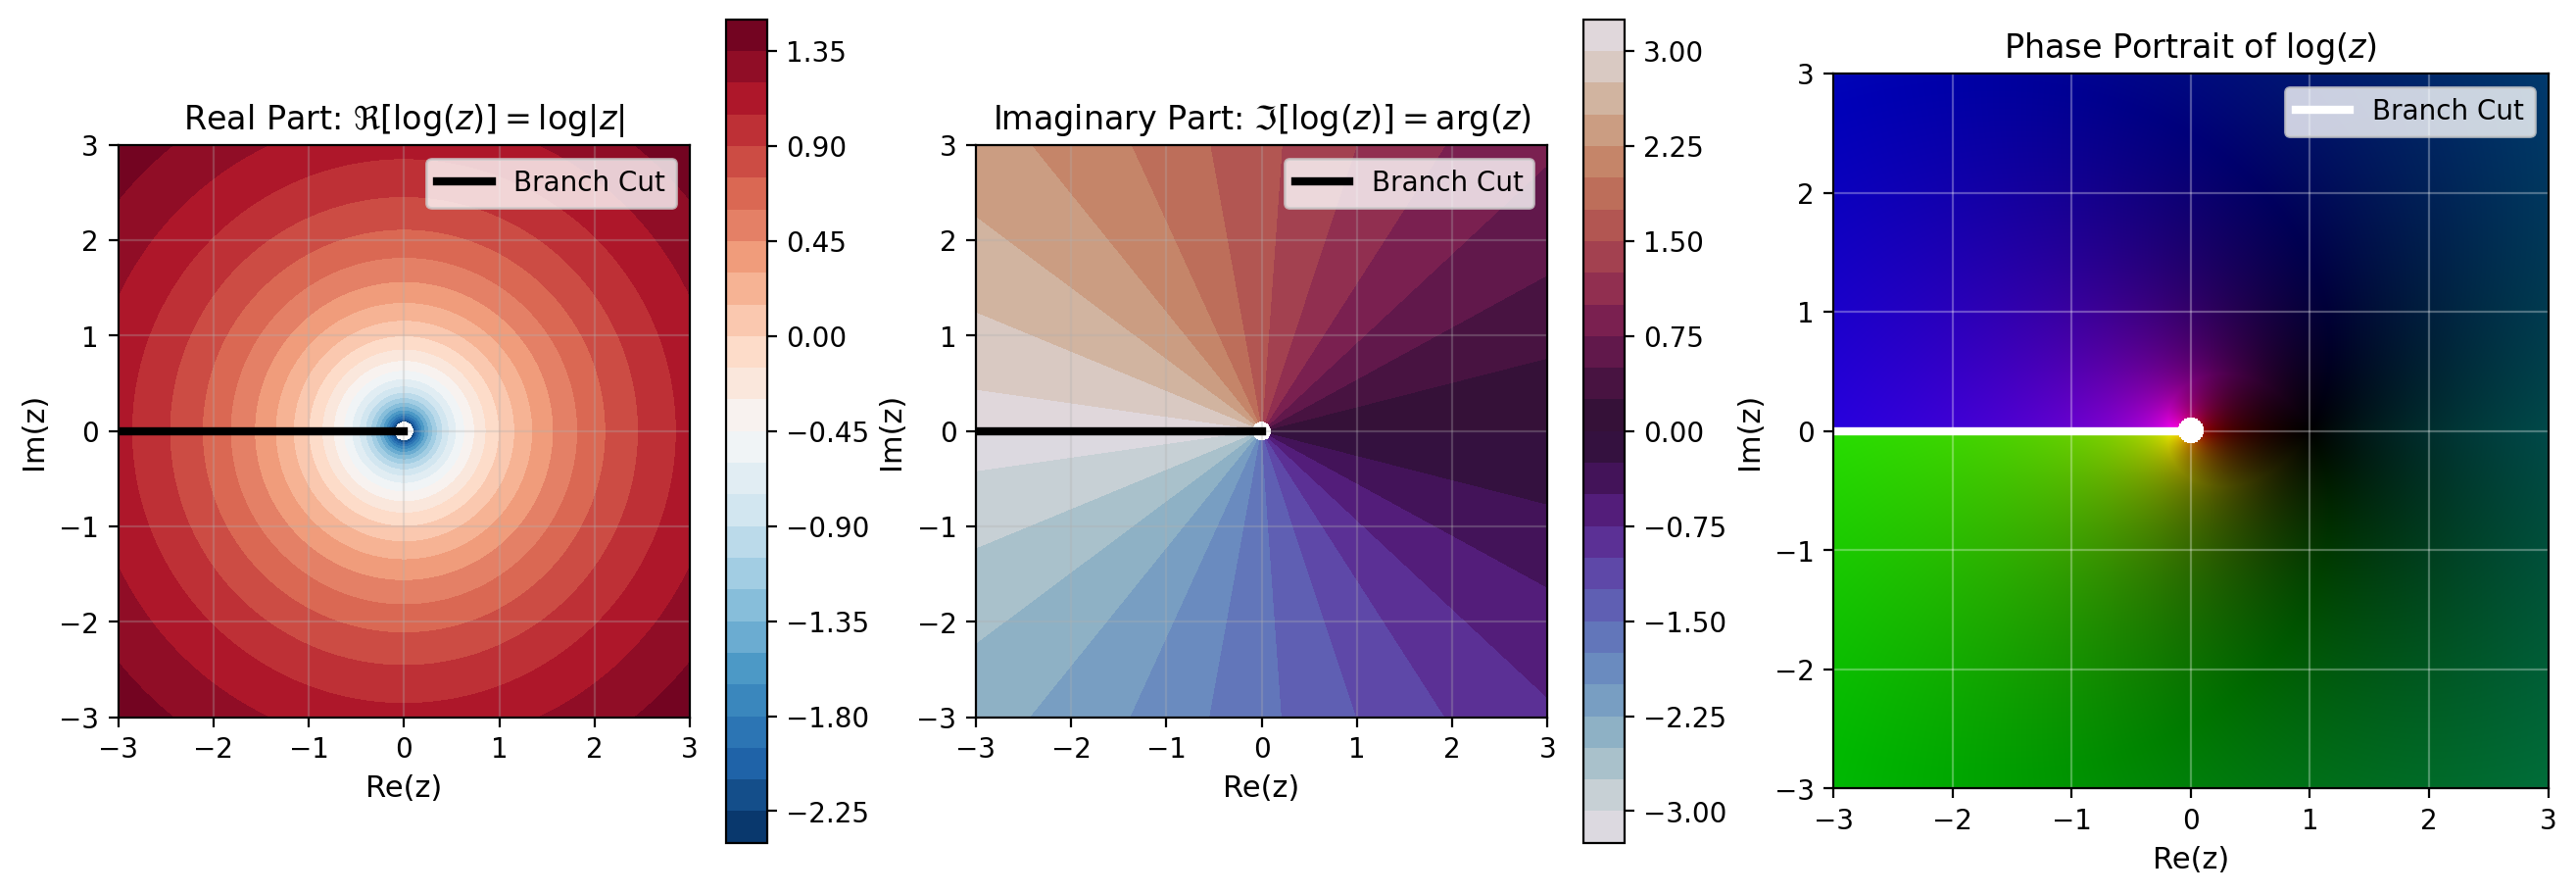

In [2]:
# Create complex grid
x = np.linspace(-3, 3, 600)
y = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# Compute complex logarithm (principal branch)
# Avoid the branch cut and origin
with np.errstate(divide='ignore', invalid='ignore'):
    log_Z = np.log(Z)
    real_part = np.real(log_Z)
    imag_part = np.imag(log_Z)

# Mask out the origin and areas too close to it
mask = np.abs(Z) < 0.1
real_part[mask] = np.nan
imag_part[mask] = np.nan

fig = plt.figure(figsize=(16, 12))

# Plot 1: Real part of Log(z)
ax1 = fig.add_subplot(2, 3, 1)
contour1 = ax1.contourf(X, Y, real_part, levels=30, cmap='RdBu_r')
ax1.plot([-3, 0], [0, 0], 'k-', linewidth=3, label='Branch Cut')
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
ax1.set_title(r'Real Part: $\Re[\log(z)] = \log|z|$')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')
plt.colorbar(contour1, ax=ax1)

# Plot 2: Imaginary part of Log(z)
ax2 = fig.add_subplot(2, 3, 2)
contour2 = ax2.contourf(X, Y, imag_part, levels=30, cmap='twilight')
ax2.plot([-3, 0], [0, 0], 'k-', linewidth=3, label='Branch Cut')
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.set_title(r'Imaginary Part: $\Im[\log(z)] = \arg(z)$')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_aspect('equal')
plt.colorbar(contour2, ax=ax2)

# Plot 3: Phase portrait (domain coloring)
ax3 = fig.add_subplot(2, 3, 3)
# Use HSV coloring: hue = arg(f(z)), brightness = |f(z)|
arg_log = np.angle(log_Z)
abs_log = np.abs(log_Z)
abs_log_normalized = np.clip(abs_log / np.nanmax(abs_log), 0, 1)
phase_color = np.zeros((*arg_log.shape, 3))
# Map angle to hue (0 to 1)
phase_color[:, :, 0] = (arg_log + np.pi) / (2*np.pi)
phase_color[:, :, 1] = np.ones_like(arg_log)  # Full saturation
phase_color[:, :, 2] = abs_log_normalized  # Brightness from magnitude

from matplotlib.colors import hsv_to_rgb
phase_color_rgb = hsv_to_rgb(phase_color)
ax3.imshow(phase_color_rgb, extent=[-3, 3, -3, 3], origin='lower', interpolation='bilinear')
ax3.plot([-3, 0], [0, 0], 'w-', linewidth=3, label='Branch Cut')
ax3.set_xlabel('Re(z)')
ax3.set_ylabel('Im(z)')
ax3.set_title(r'Phase Portrait of $\log(z)$')
ax3.legend()
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3, color='white')

print(f"Discontinuity across branch cut demonstrated")

## Visualization 2: Argument Function and Branch Cut Discontinuity

The argument function $\arg(z)$ provides the clearest illustration of the branch cut. As we traverse a path around the origin, $\arg(z)$ changes continuously until we cross the branch cut.

In [3]:
# Plot 4: Circular path around origin showing argument change
ax4 = fig.add_subplot(2, 3, 4)

# Create a circular path that crosses the branch cut
theta = np.linspace(0, 4*np.pi, 1000)  # Two complete rotations
radius = 1.5
z_path = radius * np.exp(1j * theta)

# Compute argument along the path
arg_path = np.angle(z_path)

# Plot the path in complex plane
ax4.plot(np.real(z_path[:250]), np.imag(z_path[:250]), 'b-', linewidth=2, label='Path (1st rotation)')
ax4.plot(np.real(z_path[250:500]), np.imag(z_path[250:500]), 'r-', linewidth=2, label='Path (crossing cut)')
ax4.plot(np.real(z_path[500:750]), np.imag(z_path[500:750]), 'g-', linewidth=2, label='Path (2nd rotation)')
ax4.plot(np.real(z_path[750:]), np.imag(z_path[750:]), 'm-', linewidth=2, label='Path (final)')
ax4.plot([-3, 0], [0, 0], 'k-', linewidth=3, label='Branch Cut')
ax4.plot(0, 0, 'ko', markersize=8, label='Branch Point')
ax4.set_xlabel('Re(z)')
ax4.set_ylabel('Im(z)')
ax4.set_title('Circular Path Around Branch Point')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.set_aspect('equal')
ax4.set_xlim(-3, 3)
ax4.set_ylim(-3, 3)

# Plot 5: Argument as a function of path parameter
ax5 = fig.add_subplot(2, 3, 5)
ax5.plot(theta, arg_path, 'b-', linewidth=2)
ax5.axhline(y=np.pi, color='r', linestyle='--', label=r'$\pi$')
ax5.axhline(y=-np.pi, color='r', linestyle='--', label=r'$-\pi$')
ax5.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax5.set_xlabel(r'Path parameter $\theta$ (radians)')
ax5.set_ylabel(r'$\arg(z)$')
ax5.set_title(r'Argument Function: Jump at Branch Cut')
ax5.grid(True, alpha=0.3)
ax5.legend()

print(f"Jump discontinuity: {2*np.pi:.4f} radians")

Jump discontinuity: 6.2832 radians


## Visualization 3: Complex Square Root Branch Structure

The square root function $w = \sqrt{z}$ has two branches. The principal branch is:

$$\sqrt{z} = \sqrt{|z|}e^{i\arg(z)/2}, \quad -\pi < \arg(z) \leq \pi$$

The second branch differs by a sign.

In [4]:
# Plot 6: Square root function
ax6 = fig.add_subplot(2, 3, 6)

# Compute principal branch of square root
with np.errstate(divide='ignore', invalid='ignore'):
    sqrt_Z = np.sqrt(Z)
    real_sqrt = np.real(sqrt_Z)
    imag_sqrt = np.imag(sqrt_Z)

# Mask out problematic regions
real_sqrt[mask] = np.nan
imag_sqrt[mask] = np.nan

# Create combined visualization showing both real and imaginary parts
magnitude_sqrt = np.abs(sqrt_Z)
contour6 = ax6.contourf(X, Y, magnitude_sqrt, levels=30, cmap='viridis')
ax6.plot([-3, 0], [0, 0], 'r-', linewidth=3, label='Branch Cut')
ax6.plot(0, 0, 'ro', markersize=8, label='Branch Point')

# Add streamlines to show the mapping
u = np.real(sqrt_Z)
v = np.imag(sqrt_Z)
speed = np.sqrt(u**2 + v**2)
u_norm = u / (speed + 1e-10)
v_norm = v / (speed + 1e-10)

step = 30
ax6.quiver(X[::step, ::step], Y[::step, ::step], 
           u_norm[::step, ::step], v_norm[::step, ::step],
           alpha=0.4, scale=30, color='white')

ax6.set_xlabel('Re(z)')
ax6.set_ylabel('Im(z)')
ax6.set_title(r'Principal Branch: $|\sqrt{z}|$')
ax6.legend()
ax6.grid(True, alpha=0.3)
ax6.set_aspect('equal')
plt.colorbar(contour6, ax=ax6, label=r'$|\sqrt{z}|$')

plt.tight_layout()
plt.savefig('branch_cuts_complex_analysis_analysis.png', dpi=150, bbox_inches='tight')
print("\nPlot saved as 'plot.png'")
plt.show()


Plot saved as 'plot.png'


/tmp/ipykernel_151965/2536732226.py:38: UserWarning: Adding colorbar to a different Figure <Figure size 1600x1200 with 9 Axes> than <Figure size 1600x1200 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(contour6, ax=ax6, label=r'$|\sqrt{z}|$')


<Figure size 1600x1200 with 0 Axes>

## Riemann Surface Representation

The true geometric structure of multi-valued functions is a **Riemann surface**, where multiple sheets are connected at branch points. For $\log(z)$, the Riemann surface has infinitely many sheets, each corresponding to a different value of $k$ in $\log(z) + 2\pi i k$.


Final plot saved as 'plot.png'
Riemann surface visualization complete.


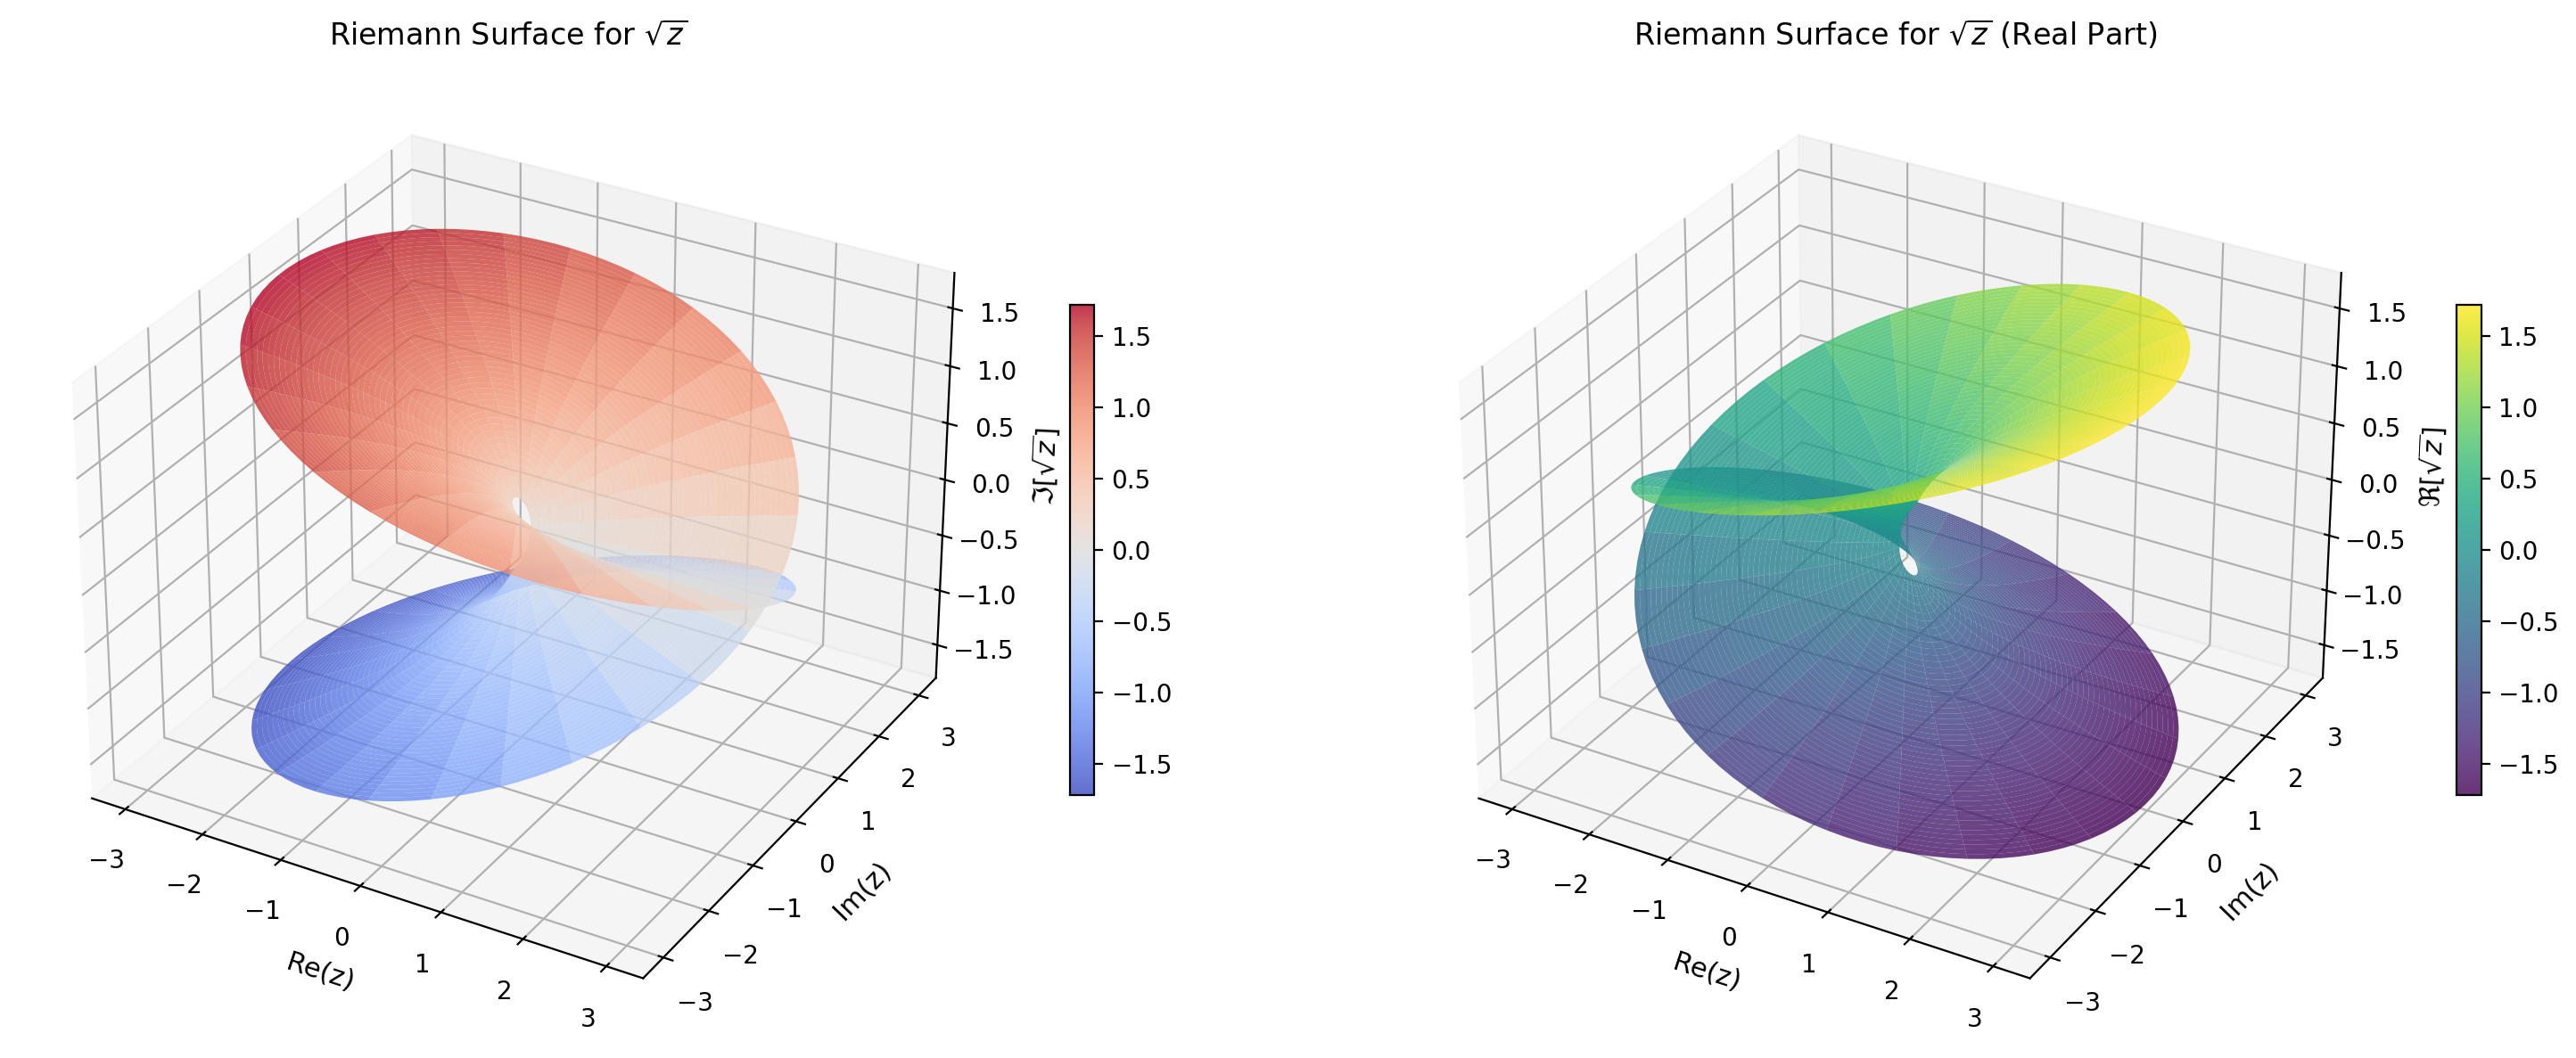

In [5]:
# Create 3D visualization of Riemann surface for sqrt(z)
fig_3d = plt.figure(figsize=(16, 6))

# Riemann surface for sqrt(z): two sheets
r = np.linspace(0.1, 3, 50)
theta = np.linspace(-np.pi, 3*np.pi, 200)
R, THETA = np.meshgrid(r, theta)

# Convert to Cartesian coordinates for the domain
X_3d = R * np.cos(THETA)
Y_3d = R * np.sin(THETA)

# Compute sqrt(z) = sqrt(r) * exp(i*theta/2)
Z_complex = R * np.exp(1j * THETA)
sqrt_Z_complex = np.sqrt(R) * np.exp(1j * THETA / 2)

# Use imaginary part of sqrt(z) as height
Z_height = np.imag(sqrt_Z_complex)

ax_3d = fig_3d.add_subplot(1, 2, 1, projection='3d')
surf = ax_3d.plot_surface(X_3d, Y_3d, Z_height, cmap='coolwarm', 
                          alpha=0.8, linewidth=0, antialiased=True)
ax_3d.set_xlabel('Re(z)')
ax_3d.set_ylabel('Im(z)')
ax_3d.set_zlabel(r'$\Im[\sqrt{z}]$')
ax_3d.set_title(r'Riemann Surface for $\sqrt{z}$')
fig_3d.colorbar(surf, ax=ax_3d, shrink=0.5)

# Alternative view: real part
Z_height_real = np.real(sqrt_Z_complex)
ax_3d_2 = fig_3d.add_subplot(1, 2, 2, projection='3d')
surf2 = ax_3d_2.plot_surface(X_3d, Y_3d, Z_height_real, cmap='viridis',
                             alpha=0.8, linewidth=0, antialiased=True)
ax_3d_2.set_xlabel('Re(z)')
ax_3d_2.set_ylabel('Im(z)')
ax_3d_2.set_zlabel(r'$\Re[\sqrt{z}]$')
ax_3d_2.set_title(r'Riemann Surface for $\sqrt{z}$ (Real Part)')
fig_3d.colorbar(surf2, ax=ax_3d_2, shrink=0.5)

plt.tight_layout()
plt.savefig('branch_cuts_complex_analysis_visualization.png', dpi=150, bbox_inches='tight')
print("\nFinal plot saved as 'plot.png'")
print("Riemann surface visualization complete.")
plt.show()

## Summary and Key Results

### Branch Cut Properties

1. **Necessity**: Branch cuts are required to make multi-valued functions single-valued and analytic in a domain.

2. **Location**: The standard branch cut for $\log(z)$ is along $(-\infty, 0]$, but other choices are possible depending on the application.

3. **Discontinuity**: The function exhibits a jump discontinuity across the branch cut:
   $$\Delta \log(z) = 2\pi i$$
   when crossing from below to above.

4. **Analyticity**: Away from the branch cut and branch point, the function is analytic and satisfies the Cauchy-Riemann equations.

### Physical Applications

- **Quantum Mechanics**: Wave functions with angular momentum around a solenoid
- **Fluid Dynamics**: Flow around obstacles with circulation
- **Electromagnetism**: Magnetic field configurations with line sources
- **Signal Processing**: Hilbert transforms and analytic signals

### Computational Considerations

When implementing multi-valued functions numerically:
- Specify branch cuts explicitly
- Ensure paths of integration do not cross branch cuts
- Use analytic continuation formulas when necessary
- Be aware of numerical instabilities near branch points